In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\train_loan.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
np.sum(train_data.isnull())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train_data.isnull().mean()*100
# missing value percentage checking so treat missing values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

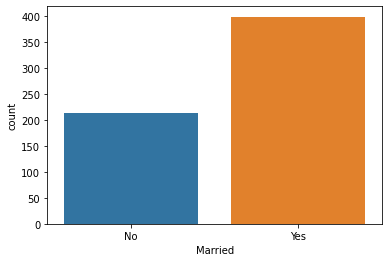

In [8]:
sns.countplot(x='Married',data=train_data)

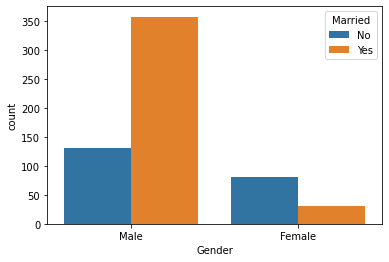

In [9]:
sns.countplot(x='Gender',data=train_data,hue='Married')

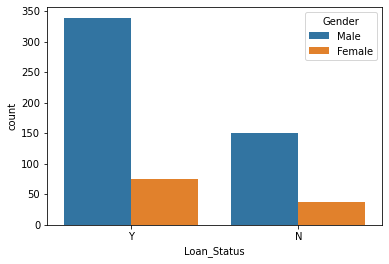

In [10]:
sns.countplot(x='Loan_Status',data=train_data,hue='Gender')

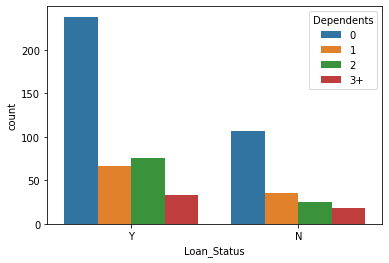

In [11]:
sns.countplot(x='Loan_Status',data=train_data,hue='Dependents')

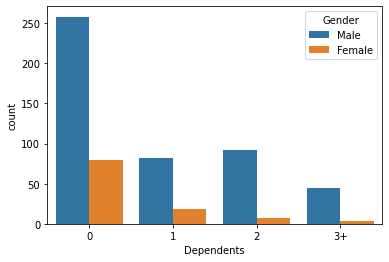

In [12]:
sns.countplot(x='Dependents',data=train_data,hue='Gender')

In [13]:
train_data['Dependents']=train_data['Dependents'].replace("\+",'',regex=True).astype(float)
train_data.Dependents.fillna(train_data.Dependents.mean(),axis=0,inplace=True)
train_data.LoanAmount.fillna(train_data.LoanAmount.median(),axis=0,inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],axis=0,inplace=True)
train_data['Gender'].fillna(train_data['Gender'].mode()[0],axis=0,inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],axis=0,inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],axis=0,inplace=True)
train_data['Education'].fillna(train_data['Education'].mode()[0],axis=0,inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(),axis=0,inplace=True)

In [14]:
np.sum(train_data.isnull())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

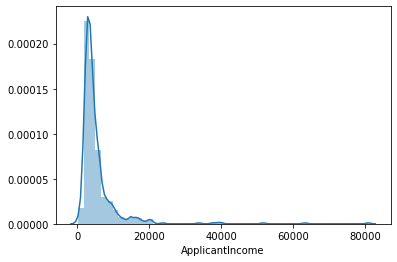

In [15]:
sns.distplot(train_data['ApplicantIncome'])
plt.show()
#data is completly on the lift side it is not good for modeling
#normalize the data

Text(0.5, 0.98, '')

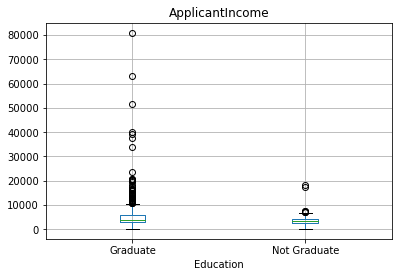

In [16]:
train_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

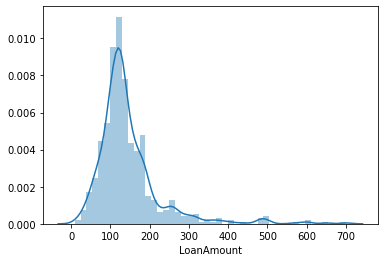

In [17]:
sns.distplot(train_data['LoanAmount'])
plt.show()

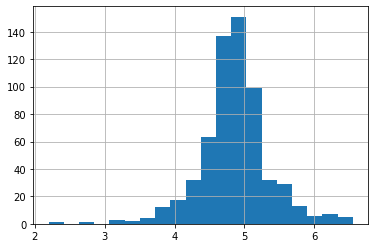

In [18]:
#otlier treatment
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

#test[‘LoanAmount_log’]=np.log(test[‘LoanAmount’])

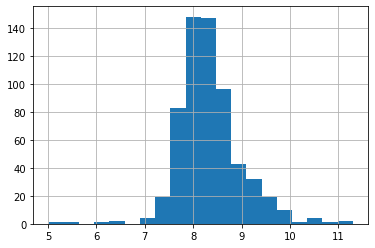

In [19]:
train_data['Applicant_log']=np.log(train_data['ApplicantIncome'])
train_data['Applicant_log'].hist(bins=20)


In [20]:
#train_data['coapplicant_log']=np.log(train_data['CoapplicantIncome'])
#train_data['coapplicant_log'].hist(bins=20)


In [21]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Applicant_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,8.674026
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515


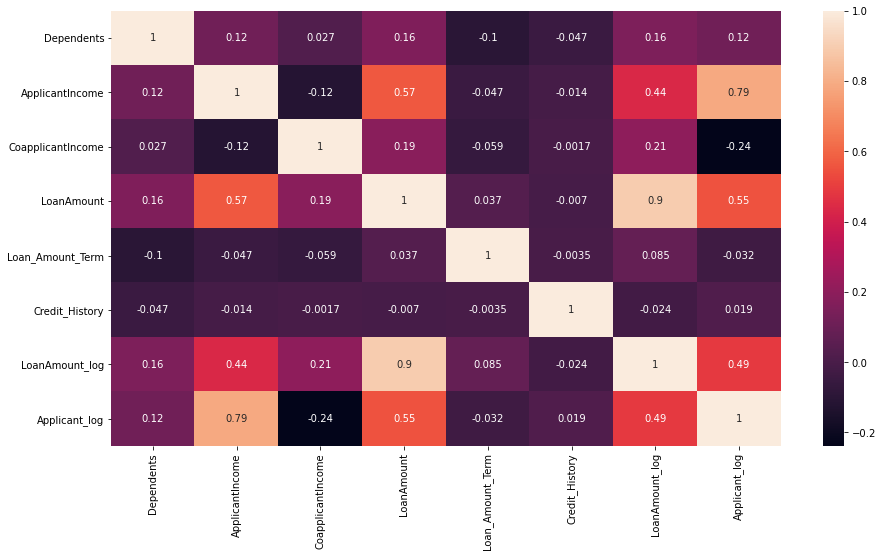

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data=train_data.corr(),annot=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Property_Area']=encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=encoder.fit_transform(train_data['Loan_Status'])
train_data['Self_Employed']=encoder.fit_transform(train_data['Self_Employed'])
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
train_data['Married']=encoder.fit_transform(train_data['Married'])
train_data['Education']=encoder.fit_transform(train_data['Education'])

In [24]:
train_data['Dependents'].value_counts()

0.000000    345
1.000000    102
2.000000    101
3.000000     51
0.762938     15
Name: Dependents, dtype: int64

In [25]:
train_data.drop(['LoanAmount','ApplicantIncome','Loan_ID'],axis=1,inplace=True)

In [26]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Applicant_log
0,1,0,0.0,0,0,0.0,360.0,1.0,2,1,4.852030,8.674026
1,1,1,1.0,0,0,1508.0,360.0,1.0,0,0,4.852030,8.430109
2,1,1,0.0,0,1,0.0,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0.0,1,0,2358.0,360.0,1.0,2,1,4.787492,7.856707
4,1,0,0.0,0,0,0.0,360.0,1.0,2,1,4.948760,8.699515


In [27]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Applicant_log
0,1,0,0.0,0,0,0.0,360.0,1.0,2,1,4.852030,8.674026
1,1,1,1.0,0,0,1508.0,360.0,1.0,0,0,4.852030,8.430109
2,1,1,0.0,0,1,0.0,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0.0,1,0,2358.0,360.0,1.0,2,1,4.787492,7.856707
4,1,0,0.0,0,0,0.0,360.0,1.0,2,1,4.948760,8.699515


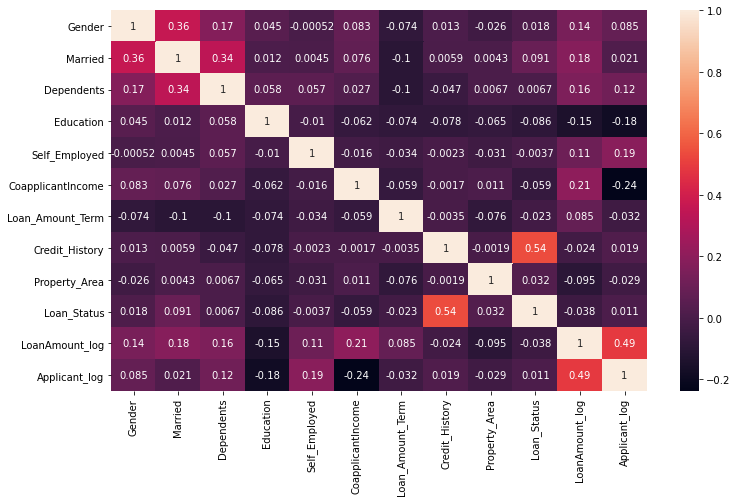

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(data=train_data.corr(),annot=True)

In [29]:
#featurs.drop(['Self_Employed_No','Self_Employed_Yes'],axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

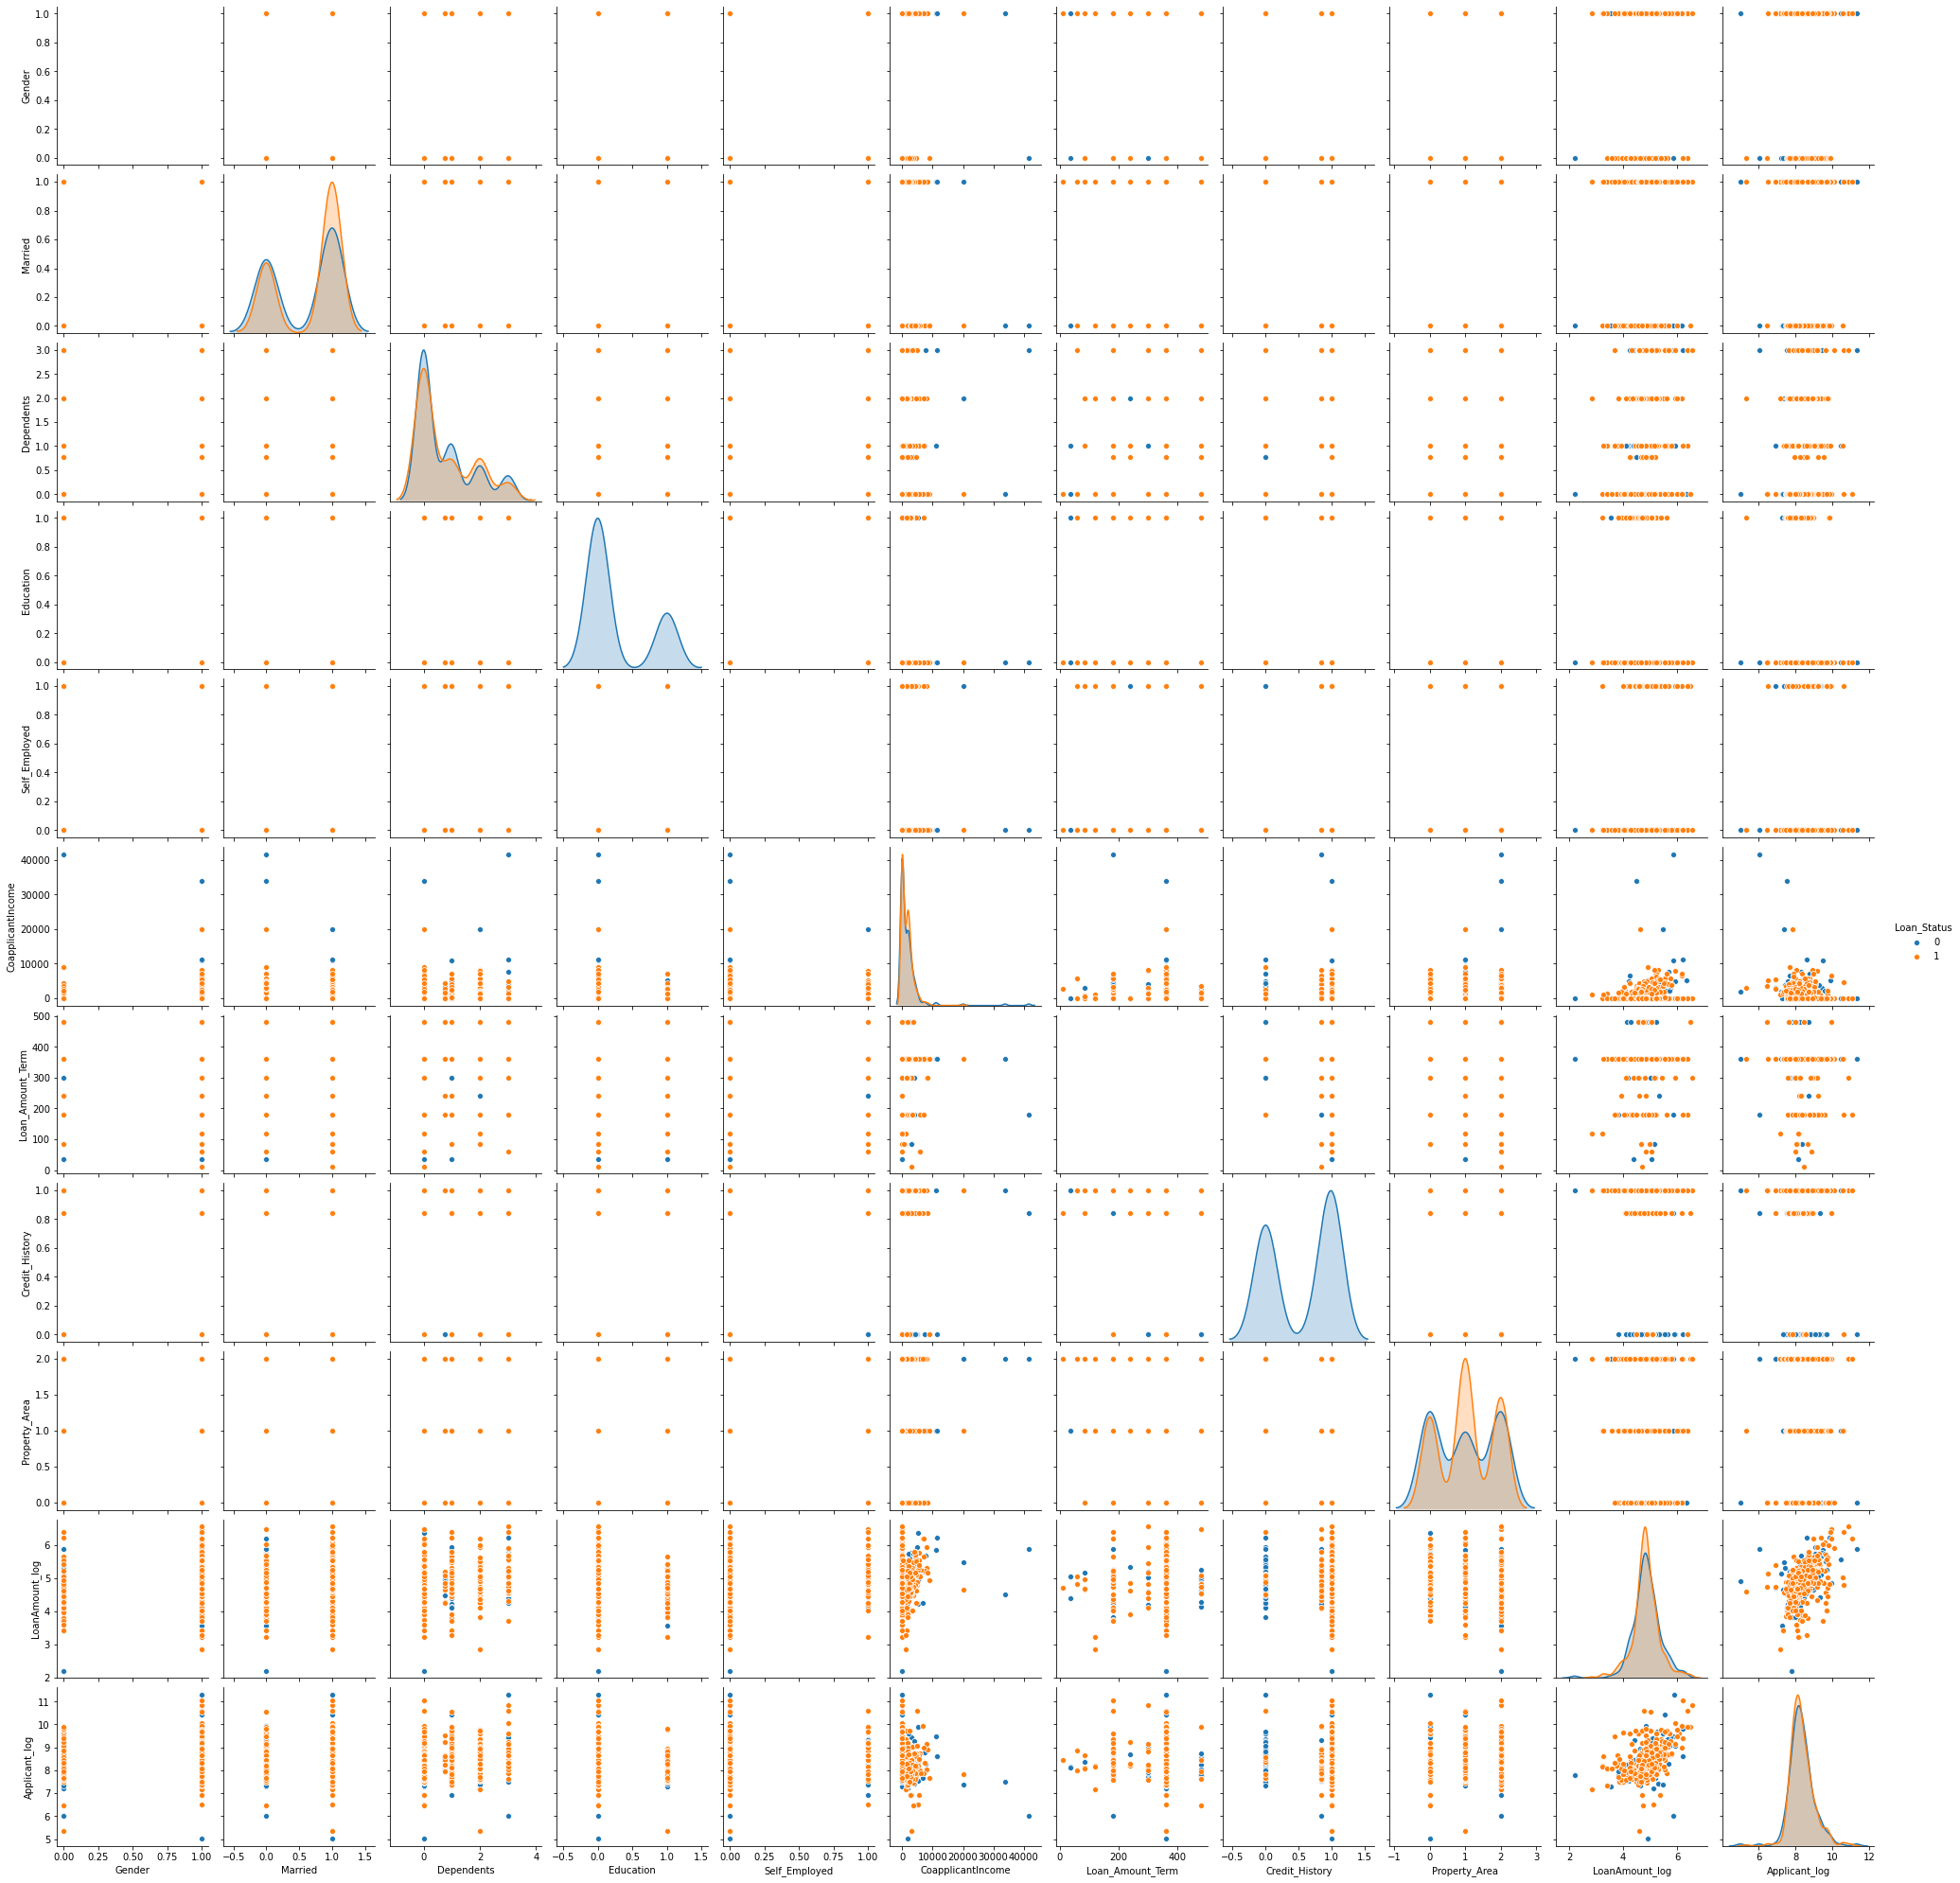

In [30]:
sns.pairplot(train_data,hue='Loan_Status')

In [31]:
#featurs.drop(['Loan_ID'],axis=1)

In [32]:
featurs=train_data.drop(['Loan_Status'],axis=1)
label=train_data['Loan_Status']

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(featurs,label)

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.02216575 0.01870003 0.057902   0.02032219 0.02016702 0.11555671
 0.04997189 0.29275495 0.04984355 0.17396478 0.17865113]


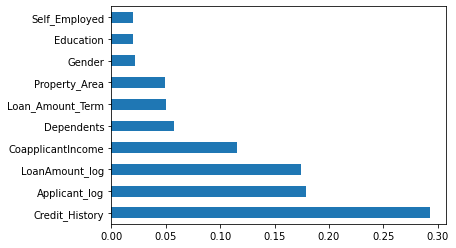

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featurs.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
featurs.drop(['Education','Gender','Self_Employed'],axis=1,inplace=True)

In [37]:
featurs

,Married,Dependents,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Applicant_log
0,0,0.0,0.0,360.0,1.0,2,4.852030,8.674026
1,1,1.0,1508.0,360.0,1.0,0,4.852030,8.430109
2,1,0.0,0.0,360.0,1.0,2,4.189655,8.006368
3,1,0.0,2358.0,360.0,1.0,2,4.787492,7.856707
4,0,0.0,0.0,360.0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...
609,0,0.0,0.0,360.0,1.0,0,4.262680,7.972466
610,1,3.0,0.0,180.0,1.0,0,3.688879,8.320205
611,1,1.0,240.0,360.0,1.0,2,5.533389,8.996157
612,1,2.0,0.0,360.0,1.0,2,5.231109,8.933664


In [38]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit_transform(featurs,label)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.55333251e-03, 1.34724687e-02, 2.40848752e-02],
       [6.44991962e-04, 6.44991962e-04, 9.72647879e-01, ...,
        0.00000000e+00, 3.12952052e-03, 5.43735260e-03],
       [2.77683888e-03, 0.00000000e+00, 0.00000000e+00, ...,
        5.55367775e-03, 1.16339962e-02, 2.22323927e-02],
       ...,
       [2.31051934e-03, 2.31051934e-03, 5.54524640e-01, ...,
        4.62103867e-03, 1.27850034e-02, 2.07857937e-02],
       [2.77652290e-03, 5.55304579e-03, 0.00000000e+00, ...,
        5.55304579e-03, 1.45242929e-02, 2.48045231e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.77674973e-03, 1.35792756e-02, 2.34083031e-02]])

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(featurs,label,test_size=0.25,random_state=12)

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=1000,criterion='gini',max_features='sqrt',min_weight_fraction_leaf=0.01)
forest.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', min_weight_fraction_leaf=0.01,
                       n_estimators=1000)

In [41]:
forest.score(X_train,y_train)

0.8217391304347826

In [42]:
forest.score(X_test,y_test)

0.8311688311688312

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred_log=forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.12%


In [45]:
test_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\test_loan.csv")

In [46]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
test_data['Dependents']=test_data['Dependents'].replace("\+",'',regex=True).astype(float)
test_data.Dependents.fillna(test_data.Dependents.mean(),axis=0,inplace=True)
test_data.LoanAmount.fillna(test_data.LoanAmount.median(),axis=0,inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],axis=0,inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0],axis=0,inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0],axis=0,inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],axis=0,inplace=True)
test_data['Education'].fillna(test_data['Education'].mode()[0],axis=0,inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(),axis=0,inplace=True)


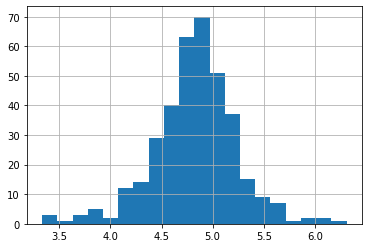

In [48]:
#otlier treatment
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])
test_data['LoanAmount_log'].hist(bins=20)

#test[‘LoanAmount_log’]=np.log(test[‘LoanAmount’])

In [49]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,4.700480
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4.836282
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,5.337538
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4.605170
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,4.356709


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
test_data['Property_Area']=encoder.fit_transform(test_data['Property_Area'])
#train_data['Loan_Status']=encoder.fit_transform(train_data['Loan_Status'])
test_data['Self_Employed']=encoder.fit_transform(test_data['Self_Employed'])
test_data['Gender']=encoder.fit_transform(test_data['Gender'])
test_data['Married']=encoder.fit_transform(test_data['Married'])
test_data['Education']=encoder.fit_transform(test_data['Education'])

In [51]:
testing_data=test_data[['Married','Dependents','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_log']]

In [52]:
testing_data

,Married,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,0.0,5720,0,360.0,1.000000,2,4.700480
1,1,1.0,3076,1500,360.0,1.000000,2,4.836282
2,1,2.0,5000,1800,360.0,1.000000,2,5.337538
3,1,2.0,2340,2546,360.0,0.825444,2,4.605170
4,0,0.0,3276,0,360.0,1.000000,2,4.356709
...,...,...,...,...,...,...,...,...
362,1,3.0,4009,1777,360.0,1.000000,2,4.727388
363,1,0.0,4158,709,360.0,1.000000,2,4.744932
364,0,0.0,3250,1993,360.0,0.825444,1,4.836282
365,1,0.0,5000,2393,360.0,1.000000,0,5.062595


In [53]:
#test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [54]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.000000,2,4.700480
1,LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.000000,2,4.836282
2,LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.000000,2,5.337538
3,LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.825444,2,4.605170
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.000000,2,4.356709


In [55]:
x=testing_data

In [56]:
test_data['Loan_Status']=forest.predict(x)

In [57]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
0,LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.000000,2,4.700480,1
1,LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.000000,2,4.836282,1
2,LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.000000,2,5.337538,1
3,LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.825444,2,4.605170,1
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.000000,2,4.356709,1


In [58]:
result=test_data[['Loan_ID','Loan_Status']]

In [64]:
test_data['Loan_Status'].value_counts()

In [60]:
result.to_csv('loa1.csv',index=0)